## Rishi's Football Project

Creating a live match predictor for the Premier League

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Import dataset
df = pd.read_csv('FB_2023 - Sheet1.csv')

In [ ]:
df.shape

(380, 108)

In [ ]:
df.info

<bound method DataFrame.info of     Div        Date   Time        HomeTeam       AwayTeam  \
0    E0  05/08/2022  20:00  Crystal Palace        Arsenal   
1    E0  06/08/2022  12:30          Fulham      Liverpool   
2    E0  06/08/2022  15:00     Bournemouth    Aston Villa   
3    E0  06/08/2022  15:00           Leeds         Wolves   
4    E0  06/08/2022  15:00       Newcastle  Nott'm Forest   
..   ..         ...    ...             ...            ...   
375  E0  28/05/2023  16:30         Everton    Bournemouth   
376  E0  28/05/2023  16:30           Leeds      Tottenham   
377  E0  28/05/2023  16:30       Leicester       West Ham   
378  E0  28/05/2023  16:30      Man United         Fulham   
379  E0  28/05/2023  16:30     Southampton      Liverpool   

     H_Ranking_Prior_Season  A_Ranking_Prior_Season  FTHG  FTAG FTR  ...  \
0                        12                       5     0     2   A  ...   
1                        18                       2     2     2   D  ...   
2      

In [ ]:
df.head()

,Div,Date,Time,HomeTeam,AwayTeam,H_Ranking_Prior_Season,A_Ranking_Prior_Season,FTHG,FTAG,FTR,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,05/08/2022,20:00,Crystal Palace,Arsenal,12,5,0,2,A,...,1.76,0.50,2.09,1.84,2.04,1.88,2.09,1.88,2.03,1.85
1,E0,06/08/2022,12:30,Fulham,Liverpool,18,2,2,2,D,...,2.73,1.75,1.90,2.03,1.91,2.02,2.01,2.06,1.89,1.99
2,E0,06/08/2022,15:00,Bournemouth,Aston Villa,18,14,2,0,H,...,1.76,0.50,1.93,2.00,1.93,2.00,1.94,2.04,1.88,2.00
3,E0,06/08/2022,15:00,Leeds,Wolves,17,10,2,1,H,...,1.87,-0.25,2.08,1.85,2.10,1.84,2.14,1.87,2.08,1.81
4,E0,06/08/2022,15:00,Newcastle,Nott'm Forest,11,18,2,0,H,...,1.89,-1.00,1.97,1.96,1.99,1.93,2.19,1.97,2.03,1.86


In [ ]:
df.isnull().sum()

Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
           ..
PCAHA       0
MaxCAHH     0
MaxCAHA     0
AvgCAHH     0
AvgCAHA     0
Length: 108, dtype: int64

In [ ]:
df.columns

Index(['Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam', 'H_Ranking_Prior_Season',
       'A_Ranking_Prior_Season', 'FTHG', 'FTAG', 'FTR',
       ...
       'AvgC<2.5', 'AHCh', 'B365CAHH', 'B365CAHA', 'PCAHH', 'PCAHA', 'MaxCAHH',
       'MaxCAHA', 'AvgCAHH', 'AvgCAHA'],
      dtype='object', length=108)

## EDA (Exploratory Data Analysis)



In [ ]:
# Keep only columns that can inform matches before game or during half time
df = df[['Date','Time','HomeTeam','AwayTeam','H_Ranking_Prior_Season','A_Ranking_Prior_Season','FTHG','FTAG','FTR','HTHG','HTAG','HTR','Referee','B365H','B365D','B365A']]

In [ ]:
df.head()

,Date,Time,HomeTeam,AwayTeam,H_Ranking_Prior_Season,A_Ranking_Prior_Season,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,B365H,B365D,B365A
0,05/08/2022,20:00,Crystal Palace,Arsenal,12,5,0,2,A,0,1,A,A Taylor,4.20,3.6,1.85
1,06/08/2022,12:30,Fulham,Liverpool,18,2,2,2,D,1,0,H,A Madley,11.00,6.0,1.25
2,06/08/2022,15:00,Bournemouth,Aston Villa,18,14,2,0,H,1,0,H,P Bankes,3.75,3.5,2.00
3,06/08/2022,15:00,Leeds,Wolves,17,10,2,1,H,1,1,D,R Jones,2.25,3.4,3.20
4,06/08/2022,15:00,Newcastle,Nott'm Forest,11,18,2,0,H,0,0,D,S Hooper,1.66,3.8,5.25


In [ ]:
# Shape of data
print('Shape of data: ', df.shape)
print('\n')
# Is there a home team advantage?
print('Full time results:')
print(df['FTR'].value_counts() / df.shape[0])

print('\n')
# Is there a home team advantage at half time?
print('Half time results:')
print(df['HTR'].value_counts() / df.shape[0])

Shape of data:  (380, 16)


Full time results:
H    0.484211
A    0.286842
D    0.228947
Name: FTR, dtype: float64


Half time results:
D    0.384211
H    0.363158
A    0.252632
Name: HTR, dtype: float64


In [ ]:
#confusion matrix of team results based on half-time
print('Confusion matrix, half-time to full-time')
print(pd.crosstab(df['HTR'], df['FTR'], rownames=['Half-Time'], colnames=['Full-Time']))

Confusion matrix, half-time to full-time
Full-Time   A   D    H
Half-Time             
A          62  22   12
D          39  51   56
H           8  14  116


This shows us that half-time results are fairly predictive of full-time end results, except in the case of draws at the half, for which the final results are pretty evenly split.

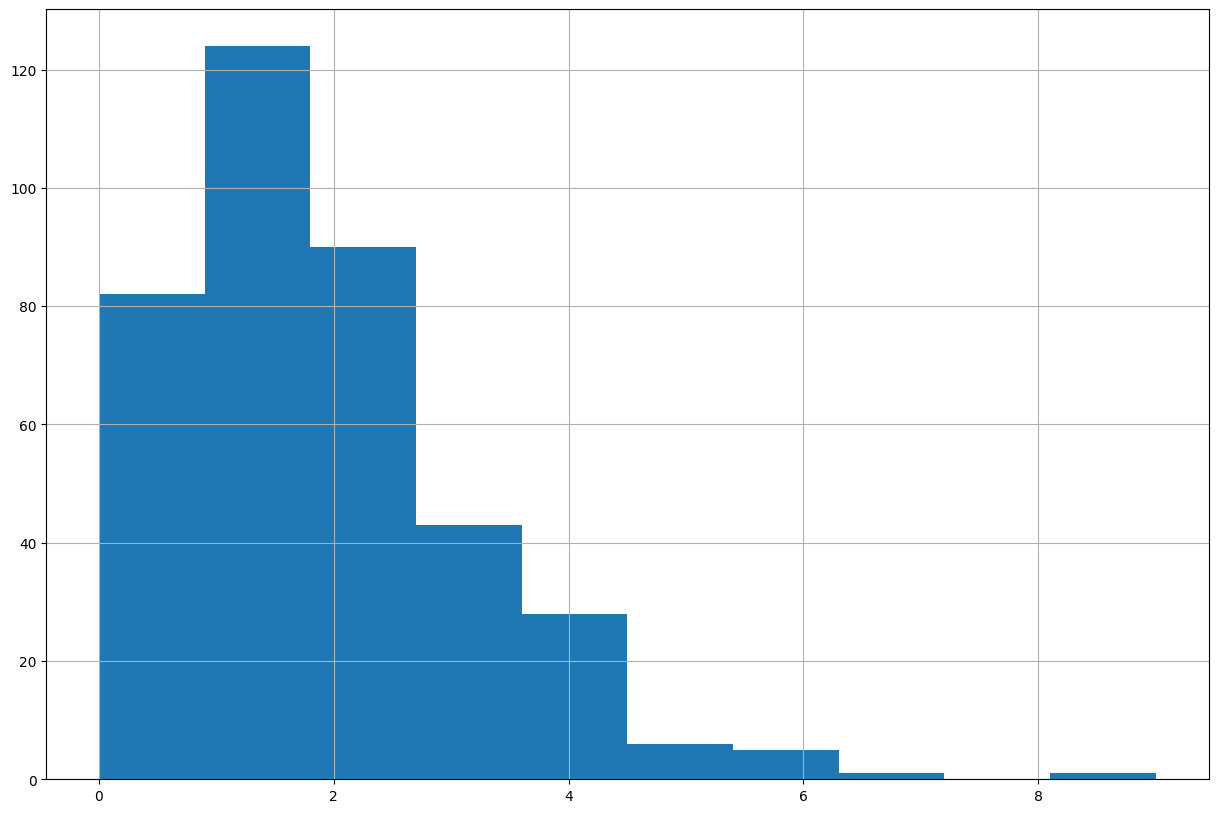

In [ ]:
# Histogram of full-time home team goals
df['FTHG'].hist(bins=10, figsize=(15,10))
plt.show()

<Axes: >

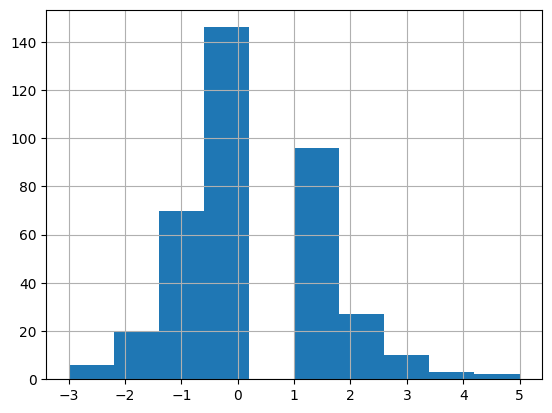

In [ ]:
## Variable creation (point difference at half: Home Goals - Away Goals)
df['half_time_GD'] = df['HTHG'] - df['HTAG']

## Explore how predictive the goal difference is of final outcomes
df['half_time_GD'].hist()

In [ ]:
print('Confusion matrix, half-time goal difference compared to full-time match result')
print(pd.crosstab(df['half_time_GD'], df['FTR'], rownames=['Half-Time Goal Difference (Home - Away)'], colnames=['Full-Time']))

Confusion matrix, half-time goal difference compared to full-time match result
Full-Time                                 A   D   H
Half-Time Goal Difference (Home - Away)            
-3                                        6   0   0
-2                                       17   1   2
-1                                       39  21  10
 0                                       39  51  56
 1                                        7  14  75
 2                                        1   0  26
 3                                        0   0  10
 4                                        0   0   3
 5                                        0   0   2


In [ ]:
df.head()

,Date,Time,HomeTeam,AwayTeam,H_Ranking_Prior_Season,A_Ranking_Prior_Season,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,B365H,B365D,B365A,half_time_GD
0,05/08/2022,20:00,Crystal Palace,Arsenal,12,5,0,2,A,0,1,A,A Taylor,4.20,3.6,1.85,-1
1,06/08/2022,12:30,Fulham,Liverpool,18,2,2,2,D,1,0,H,A Madley,11.00,6.0,1.25,1
2,06/08/2022,15:00,Bournemouth,Aston Villa,18,14,2,0,H,1,0,H,P Bankes,3.75,3.5,2.00,1
3,06/08/2022,15:00,Leeds,Wolves,17,10,2,1,H,1,1,D,R Jones,2.25,3.4,3.20,0
4,06/08/2022,15:00,Newcastle,Nott'm Forest,11,18,2,0,H,0,0,D,S Hooper,1.66,3.8,5.25,0


Text(0, 0.5, 'Home team goals (full time)')

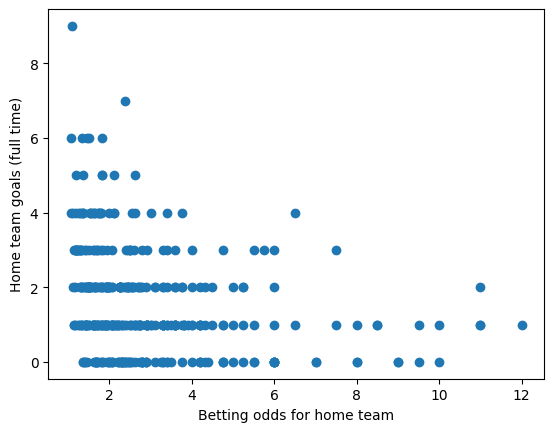

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x = df['B365H'], y = df['FTHG'])
ax.set_xlabel('Betting odds for home team')
ax.set_ylabel('Home team goals (full time)')

<Axes: >

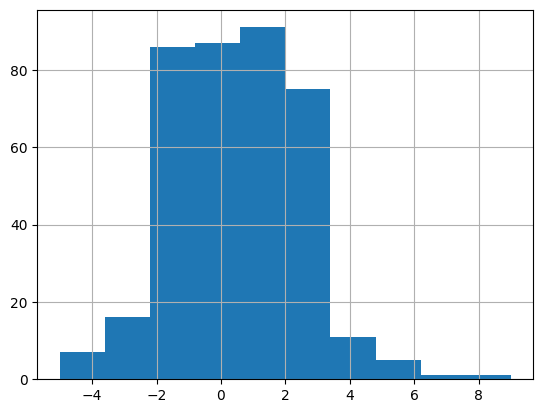

In [ ]:
## Variable creation (point difference at full time: Home Goals - Away Goals)
df['full_time_GD'] = df['FTHG'] - df['FTAG']

## Explore how predictive the goal difference is of final outcomes
df['full_time_GD'].hist()

Text(0, 0.5, 'Full time goal difference (home - away)')

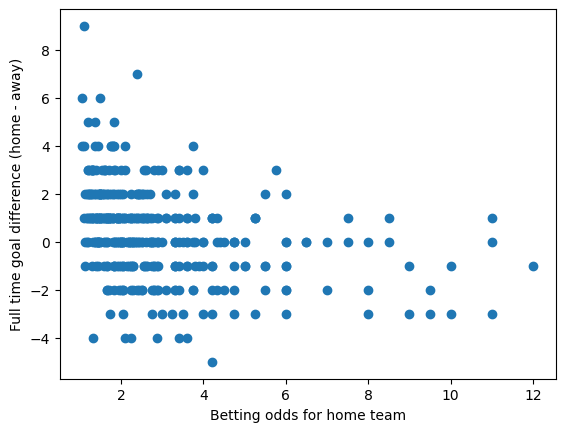

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x = df['B365H'], y = df['full_time_GD'])
ax.set_xlabel('Betting odds for home team')
ax.set_ylabel('Full time goal difference (home - away)')

Text(0, 0.5, 'Full time goal difference (home - away)')

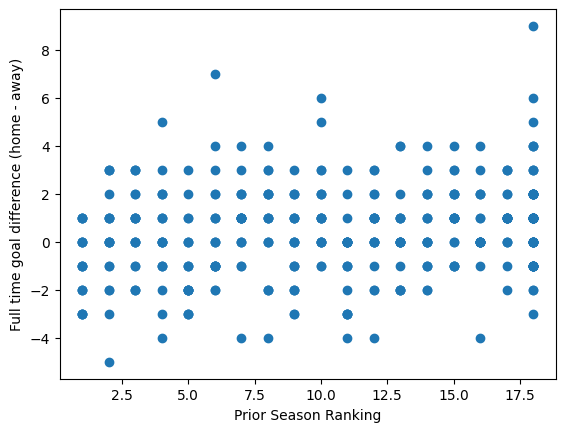

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x = df['A_Ranking_Prior_Season'], y = df['full_time_GD'])
ax.set_xlabel('Prior Season Ranking')
ax.set_ylabel('Full time goal difference (home - away)')

## Baseline Model

In [ ]:
# separate features from the target
y = df['FTR'] # target variable (winning team)
X = df.drop(columns = ['Date','Time','Referee','FTR','FTHG','FTAG','full_time_GD'])

In [ ]:
#One-Hot encode all categorical variables

# Function for one-hot encoding, takes dataframe and features to encode
# returns one-hot encoded dataframe
# from: https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)
# features to one-hot encode in our data
features_to_encode = ['HomeTeam','AwayTeam']

for feature in features_to_encode:
    X = encode_and_bind(X, feature)

# results of one-hot encoding
X.head()

,H_Ranking_Prior_Season,A_Ranking_Prior_Season,HTHG,HTAG,HTR,B365H,B365D,B365A,half_time_GD,HomeTeam_Arsenal,...,AwayTeam_Leicester,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,AwayTeam_Newcastle,AwayTeam_Nott'm Forest,AwayTeam_Southampton,AwayTeam_Tottenham,AwayTeam_West Ham,AwayTeam_Wolves
0,12,5,0,1,A,4.20,3.6,1.85,-1,0,...,0,0,0,0,0,0,0,0,0,0
1,18,2,1,0,H,11.00,6.0,1.25,1,0,...,0,1,0,0,0,0,0,0,0,0
2,18,14,1,0,H,3.75,3.5,2.00,1,0,...,0,0,0,0,0,0,0,0,0,0
3,17,10,1,1,D,2.25,3.4,3.20,0,0,...,0,0,0,0,0,0,0,0,0,1
4,11,18,0,0,D,1.66,3.8,5.25,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
#split into test and training datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train

,H_Ranking_Prior_Season,A_Ranking_Prior_Season,HTHG,HTAG,HTR,B365H,B365D,B365A,half_time_GD,HomeTeam_Arsenal,...,AwayTeam_Leicester,AwayTeam_Liverpool,AwayTeam_Man City,AwayTeam_Man United,AwayTeam_Newcastle,AwayTeam_Nott'm Forest,AwayTeam_Southampton,AwayTeam_Tottenham,AwayTeam_West Ham,AwayTeam_Wolves
170,6,18,1,0,H,1.29,5.50,11.00,1,0,...,0,0,0,0,0,0,0,0,0,0
308,13,14,0,0,D,2.50,3.25,2.88,0,0,...,0,0,0,0,0,0,0,0,0,0
212,12,9,0,0,D,3.80,3.50,2.00,0,0,...,0,0,0,0,0,0,0,0,0,0
17,18,7,1,0,H,4.20,3.60,1.85,1,0,...,0,0,0,0,0,0,0,0,1,0
234,8,5,0,0,D,4.75,4.00,1.70,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,4,6,0,2,A,2.80,3.60,2.40,-2,0,...,0,0,0,1,0,0,0,0,0,0
192,15,14,0,0,D,2.88,3.25,2.55,0,0,...,0,0,0,0,0,0,0,0,0,0
117,18,4,1,0,H,5.00,3.80,1.70,1,0,...,0,0,0,0,0,0,0,1,0,0
47,7,4,0,1,A,3.60,3.80,1.95,-1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
y_train

170    H
308    D
212    D
17     H
234    A
      ..
323    D
192    A
117    A
47     D
172    D
Name: FTR, Length: 266, dtype: object

In [ ]:
## Baseline model
### Using half time results to predict full time (e.g. if half time winning, then predict full time winning)

# make predictions
y_pred_train = X_train['HTR']
y_pred_test = X_test['HTR']

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy on Train data: ', round(accuracy_score(y_pred_train, y_train), 3))
print('Accuracy on Test data: ', round(accuracy_score(y_pred_test, y_test),3))

Accuracy on Train data:  0.594
Accuracy on Test data:  0.623


## Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
features_to_encode = ['HTR']

for feature in features_to_encode:
    X_train = encode_and_bind(X_train, feature)

for feature in features_to_encode:
    X_test = encode_and_bind(X_test, feature)

# results of one-hot encoding
X_train.head()

,H_Ranking_Prior_Season,A_Ranking_Prior_Season,HTHG,HTAG,B365H,B365D,B365A,half_time_GD,HomeTeam_Arsenal,HomeTeam_Aston Villa,...,AwayTeam_Man United,AwayTeam_Newcastle,AwayTeam_Nott'm Forest,AwayTeam_Southampton,AwayTeam_Tottenham,AwayTeam_West Ham,AwayTeam_Wolves,HTR_A,HTR_D,HTR_H
170,6,18,1,0,1.29,5.50,11.00,1,0,0,...,0,0,0,0,0,0,0,0,0,1
308,13,14,0,0,2.50,3.25,2.88,0,0,0,...,0,0,0,0,0,0,0,0,1,0
212,12,9,0,0,3.80,3.50,2.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17,18,7,1,0,4.20,3.60,1.85,1,0,0,...,0,0,0,0,0,1,0,0,0,1
234,8,5,0,0,4.75,4.00,1.70,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
logit = LogisticRegression()
logit.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print('Logistic regression accuracy on train set: ', round(logit.score(X_train,y_train),3))

Logistic regression accuracy on train set:  0.741


In [ ]:
print('Logistic regression accuracy on test set: ', round(logit.score(X_test,y_test),3))

Logistic regression accuracy on test set:  0.561


In [ ]:
## We see evidence of overfitting (train accuracy much better than test)
## Let's explore the coefficients
logit.coef_

array([[-7.30195947e-03,  6.25254741e-02, -2.24738619e-01,
         3.53112391e-01,  2.52519879e-01, -2.35435986e-01,
        -1.49974009e-01, -5.77851010e-01,  3.62816213e-01,
        -2.13470187e-02,  4.16795087e-01, -5.51407569e-01,
        -5.68939918e-03,  1.72765366e-01, -1.79391005e-01,
         6.85284291e-01, -1.34143436e-01, -2.97391103e-01,
         3.20074107e-01, -6.48320625e-02, -2.69825153e-01,
        -7.25857598e-01, -3.72534222e-01, -4.44932726e-01,
         5.51617880e-01,  3.57303543e-01, -1.66699877e-01,
         3.11205245e-01,  5.81039557e-01,  1.06659315e-01,
         4.96263457e-01,  3.87023022e-02, -9.40950411e-02,
         6.49404666e-02, -1.76743431e-01, -4.95885351e-01,
         7.58242233e-01, -5.13872476e-01, -1.18733536e-03,
        -1.17376461e-01,  2.35832505e-01, -4.53102978e-01,
         2.62839536e-01, -6.22701317e-01,  7.44084652e-01,
         1.32096995e-01, -4.81462429e-01, -5.20463637e-01,
        -1.01000937e-01,  1.09570957e-01, -6.47594570e-0

### Hyperparamater tuning, Logistic Regression

In [ ]:
## Adjusting C parameter
logit_tuned = LogisticRegression(penalty = 'l2', C = 0.000001)
logit_tuned.fit(X_train,y_train)

LogisticRegression(C=1e-06)

In [ ]:
# storage variables
train_accuracies = []
test_accuracies = []
c_vals = np.logspace(-7, -2.5, num = 100) # Penalty parameters to test

## Hyperparameter tuning for loop
for c_val in c_vals: # For every penalty parameter we're testing

   # Fit model on training data
   logit_tuned = LogisticRegression(penalty = 'l2', C = c_val)
   logit_tuned.fit(X_train, y_train)

   # Store training and test accuracies
   train_accuracies.append(logit_tuned.score(X_train,y_train))
   test_accuracies.append(logit_tuned.score(X_test,y_test))

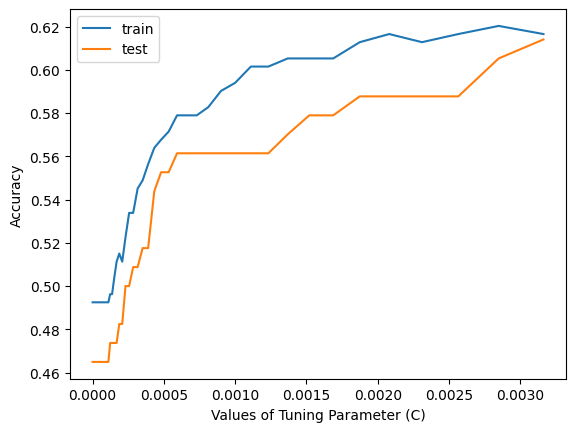

In [ ]:
# plot train and test accuracies
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(c_vals, train_accuracies, label = 'train')
ax.plot(c_vals, test_accuracies, label = 'test')
ax.set_xlabel('Values of Tuning Parameter (C)')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'best')

In [ ]:
## Determining maximizing C on test set
print('Maximum test accuracy: ', np.round(test_accuracies[np.argmax(test_accuracies)], 3))
print('Value of C that achieves max test accuracy: ', np.round(c_vals[np.argmax(test_accuracies)],5))

Maximum test accuracy:  0.614
Value of C that achieves max test accuracy:  0.00316


## Decision Tree Model


In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.5, 0.8333333333333334, 'x[7] <= 0.5\ngini = 0.627\nsamples = 266\nvalue = [75, 60, 131]'),
 Text(0.25, 0.5, 'x[4] <= 1.975\ngini = 0.656\nsamples = 169\nvalue = [70, 52, 47]'),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'x[5] <= 3.45\ngini = 0.241\nsamples = 97\nvalue = [5, 8, 84]'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

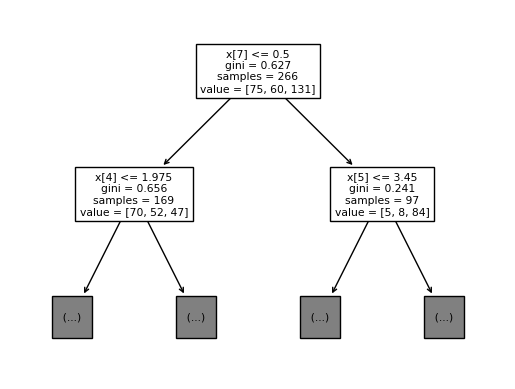

In [ ]:
sklearn.tree.plot_tree(tree,max_depth=1)

In [ ]:
X_train

,H_Ranking_Prior_Season,A_Ranking_Prior_Season,HTHG,HTAG,B365H,B365D,B365A,half_time_GD,HomeTeam_Arsenal,HomeTeam_Aston Villa,...,AwayTeam_Man United,AwayTeam_Newcastle,AwayTeam_Nott'm Forest,AwayTeam_Southampton,AwayTeam_Tottenham,AwayTeam_West Ham,AwayTeam_Wolves,HTR_A,HTR_D,HTR_H
170,6,18,1,0,1.29,5.50,11.00,1,0,0,...,0,0,0,0,0,0,0,0,0,1
308,13,14,0,0,2.50,3.25,2.88,0,0,0,...,0,0,0,0,0,0,0,0,1,0
212,12,9,0,0,3.80,3.50,2.00,0,0,0,...,0,0,0,0,0,0,0,0,1,0
17,18,7,1,0,4.20,3.60,1.85,1,0,0,...,0,0,0,0,0,1,0,0,0,1
234,8,5,0,0,4.75,4.00,1.70,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,4,6,0,2,2.80,3.60,2.40,-2,0,0,...,1,0,0,0,0,0,0,1,0,0
192,15,14,0,0,2.88,3.25,2.55,0,0,0,...,0,0,0,0,0,0,0,0,1,0
117,18,4,1,0,5.00,3.80,1.70,1,0,0,...,0,0,0,0,1,0,0,0,0,1
47,7,4,0,1,3.60,3.80,1.95,-1,0,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
print('Tree accuracy on train set: ', round(tree.score(X_train,y_train),3))

Tree accuracy on train set:  1.0


In [ ]:
print('Tree accuracy on test set: ', round(tree.score(X_test,y_test),3))

Tree accuracy on test set:  0.43


In [ ]:
# storage variables
train_accuracies = []
test_accuracies = []
min_vals = np.linspace(0.001, 1, num = 500) # Penalty parameters to test

## Hyperparameter tuning for loop
for min_val in min_vals: # For every penalty parameter we're testing

   # Fit model on training data
   tree_tuned = DecisionTreeClassifier(min_samples_split = min_val)
   tree_tuned.fit(X_train, y_train)

   # Store training and test accuracies
   train_accuracies.append(tree_tuned.score(X_train,y_train))
   test_accuracies.append(tree_tuned.score(X_test,y_test))

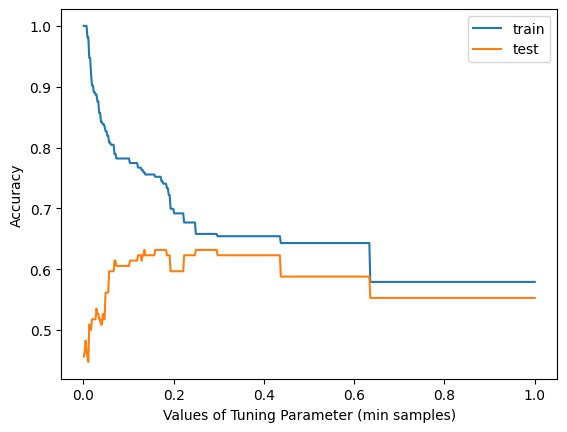

In [ ]:
# plot train and test accuracies
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(min_vals, train_accuracies, label = 'train')
ax.plot(min_vals, test_accuracies, label = 'test')
ax.set_xlabel('Values of Tuning Parameter (min samples)')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'best')

In [ ]:
print('Maximum test accuracy: ', np.round(test_accuracies[np.argmax(test_accuracies)], 3))
print('Value of min samples that achieves max test accuracy: ', np.round(min_vals[np.argmax(test_accuracies)],5))

Maximum test accuracy:  0.632
Value of min samples that achieves max test accuracy:  0.13513


## Random Forest Model

In [ ]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
print('Random forest accuracy on train set: ', round(forest.score(X_train,y_train),3))

Random forest accuracy on train set:  1.0


In [ ]:
print('Random Forest accuracy on test set: ', round(forest.score(X_test,y_test),3))

Random Forest accuracy on test set:  0.596


In [ ]:
# storage variables
train_accuracies = []
test_accuracies = []
min_vals = np.linspace(0.001, 1, num = 10) # Penalty parameters to test
nTrees = np.arange(1,1000,step=200)

## Hyperparameter tuning for loop
for min_val in min_vals: # For every penalty parameter we're testing
   for nTree in nTrees:
    # Fit model on training data
    forest_tuned = RandomForestClassifier(min_samples_split = min_val, n_estimators = nTree)
    forest_tuned.fit(X_train, y_train)

    # Store training and test accuracies
    train_accuracies.append(forest_tuned.score(X_train,y_train))
    test_accuracies.append(forest_tuned.score(X_test,y_test))

In [ ]:
np.argmax(test_accuracies)

12

In [ ]:
print('Maximum test accuracy: ', np.round(test_accuracies[np.argmax(test_accuracies)], 3))
print('Value of min samples that achieves max test accuracy: ', np.round(min_vals[round(np.argmax(test_accuracies)/1000)],5))
print('Value of min trees that achieves max test accuracy: ', np.round(nTrees[1],5))

Maximum test accuracy:  0.64
Value of min samples that achieves max test accuracy:  0.001
Value of min trees that achieves max test accuracy:  201


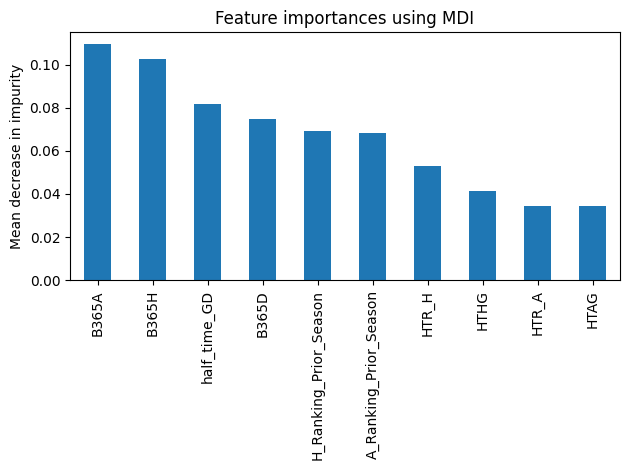

In [ ]:
# Get random forest feature importances

importances = forest.feature_importances_
feature_names = X_train.columns

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances[forest_importances > 0.02].sort_values(ascending = False).plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()